# Automatic Selection Parameter 
## GridSearchCV

* ### GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters. 
* ### It is basically a cross-validation method. the model and the parameters are required to be fed in. Best parameter values are extracted and then the predictions are made.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV


In [2]:
df = pd.read_csv('train.csv',usecols=["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"])

In [3]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


* ### Apply Imputer Median on Age Fare
* ### And Apply StandardScaler

In [8]:
numerical_features = ["Age","Fare"]

# Pipeline

In [9]:
numerical_transformer = Pipeline(
    
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

* ### Apply Imputer most_frequent on Embarked Column
* ### Apply one hot encoding on Sex Column

In [10]:
categorical_features = ["Embarked","Sex"]

In [11]:
categorical_transformer = Pipeline(
    
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ohe",OneHotEncoder(handle_unknown="ignore"))
    ]

    
)

# Attach with Columntransformer

In [12]:
preprocessor = ColumnTransformer(
    
    transformers=[
        ("num",numerical_transformer,numerical_features),
        ("cat",categorical_transformer,categorical_features)
    ]

)

# Attach preprocessor 
# Apply LogisticRegression

In [13]:
clf = Pipeline(

    steps=[
        ("preprocessor",preprocessor),
        ("classifier",LogisticRegression())
    ]
)

In [14]:
from sklearn import set_config

set_config(display="diagram")
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

# Set Parameters for GridSearchSv

### ! Note Parameters are Depends on  Code or Logic

In [15]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)


# Apply GridSearchSv

In [16]:
# clf are the complete pipeline

grid_search = GridSearchCV(clf,param_grid,cv=10)
grid_search

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Embarked',
                                                                          'Sex'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1.0, 10, 100],
                         'preprocessor__cat__imputer__strategy': ['most_frequent',
                                                                  'constant'],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']})

# Fit GridSearch

In [17]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Embarked',
                                                                          'Sex'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1.0, 10, 100],
                         'preprocessor__cat__imputer__strategy': ['most_frequent',
                                                                  'constant'],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']})

# Print Best Parameter

In [18]:
print(grid_search.best_params_)

{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


# Best Score

In [19]:
print(f"Internal CV score: {grid_search.best_score_:.4f}")

Internal CV score: 0.7879


# BackEnd Working Result in GridSearchCV

In [20]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4,0.012849,0.001732,0.005521,0.001507,1,most_frequent,mean,"{'classifier__C': 1.0, 'preprocessor__cat__imp...",0.763889,0.861111,...,0.802817,0.788732,0.760563,0.84507,0.732394,0.760563,0.788732,0.787852,0.037656,1
5,0.011749,0.000668,0.008658,0.012540,1,most_frequent,median,"{'classifier__C': 1.0, 'preprocessor__cat__imp...",0.763889,0.861111,...,0.802817,0.788732,0.760563,0.84507,0.732394,0.760563,0.788732,0.787852,0.037656,1
6,0.012394,0.001021,0.004414,0.000216,1,constant,mean,"{'classifier__C': 1.0, 'preprocessor__cat__imp...",0.763889,0.861111,...,0.802817,0.788732,0.760563,0.84507,0.732394,0.760563,0.788732,0.787852,0.037656,1
7,0.012042,0.000113,0.004366,0.000259,1,constant,median,"{'classifier__C': 1.0, 'preprocessor__cat__imp...",0.763889,0.861111,...,0.802817,0.788732,0.760563,0.84507,0.732394,0.760563,0.788732,0.787852,0.037656,1
8,0.011928,0.000590,0.004426,0.000278,10,most_frequent,mean,"{'classifier__C': 10, 'preprocessor__cat__impu...",0.763889,0.861111,...,0.802817,0.788732,0.760563,0.84507,0.732394,0.760563,0.788732,0.787852,0.037656,1
9,0.012532,0.000795,0.004681,0.000417,10,most_frequent,median,"{'classifier__C': 10, 'preprocessor__cat__impu...",0.763889,0.861111,...,0.802817,0.788732,0.760563,0.84507,0.732394,0.760563,0.788732,0.787852,0.037656,1
10,0.011985,0.000682,0.004233,0.000177,10,constant,mean,"{'classifier__C': 10, 'preprocessor__cat__impu...",0.763889,0.861111,...,0.802817,0.788732,0.760563,0.84507,0.732394,0.760563,0.788732,0.787852,0.037656,1
11,0.012392,0.000702,0.004421,0.000308,10,constant,median,"{'classifier__C': 10, 'preprocessor__cat__impu...",0.763889,0.861111,...,0.802817,0.788732,0.760563,0.84507,0.732394,0.760563,0.788732,0.787852,0.037656,1
12,0.011730,0.001672,0.005323,0.001448,100,most_frequent,mean,"{'classifier__C': 100, 'preprocessor__cat__imp...",0.763889,0.861111,...,0.802817,0.788732,0.760563,0.84507,0.732394,0.760563,0.788732,0.787852,0.037656,1
13,0.010705,0.000719,0.004482,0.000320,100,most_frequent,median,"{'classifier__C': 100, 'preprocessor__cat__imp...",0.763889,0.861111,...,0.802817,0.788732,0.760563,0.84507,0.732394,0.760563,0.788732,0.787852,0.037656,1


# Select Columns

In [21]:
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1,most_frequent,mean,0.787852
5,1,most_frequent,median,0.787852
6,1,constant,mean,0.787852
7,1,constant,median,0.787852
8,10,most_frequent,mean,0.787852
9,10,most_frequent,median,0.787852
10,10,constant,mean,0.787852
11,10,constant,median,0.787852
12,100,most_frequent,mean,0.787852
13,100,most_frequent,median,0.787852


# Example 2

In [22]:
df = pd.read_csv("./train.csv",usecols=["Fare","SibSp","Survived"])
df.head()

,Survived,SibSp,Fare
0,0,1,7.2500
1,1,1,71.2833
2,1,0,7.9250
3,1,1,53.1000
4,0,0,8.0500


In [23]:
df.isnull().sum()

Survived    0
SibSp       0
Fare        0
dtype: int64

In [24]:
x = df.drop(columns=['Survived'])
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

# Select Parameter for Distribution Data on Fare

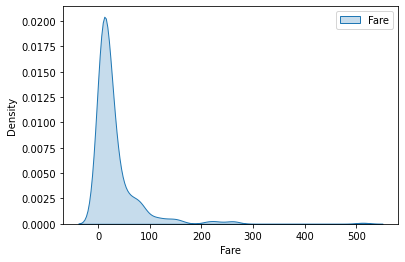

In [25]:
sns.kdeplot(df.Fare,label="Fare",fill=True)
plt.legend()
plt.show()

## Select Mathematical_Transformations
* ## log
* ## square
* ## reciprocal

In [26]:
math_trf = Pipeline(
    
    steps=[("math_trn",FunctionTransformer(func=None)),
]
)

In [27]:
preprocessor = ColumnTransformer(
    
    transformers=[
        ("num",math_trf,["Fare"]),
    ]

)

In [28]:
clf = Pipeline(

    steps=[
        ("preprocessor",preprocessor),
        ("classifier",LogisticRegression())
    ]
)

In [29]:
def recipro(x):
    return x**1/2

def square(x):
    return x**2

def log(x):
    return np.log1p(x)

In [30]:
param_grid = {
    'preprocessor__num__math_trn__func': [square,recipro,log]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)
print()
print(grid_search.best_score_)

{'preprocessor__num__math_trn__func': <function log at 0x7f5778ee0b80>}

0.6795774647887324
